In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from pymatch.Matcher import Matcher

In [3]:
#. import PITF provided replication data
pitf_data_raw = pd.read_csv('./data/PITF Global Model Replication Data 121709.dta.csv', index_col=0)

In [63]:
pitf_data_raw.columns

Index(['sftgcode', 'year', 'byregn2', 'group', 'sftgname', 'feanctig',
       'sftptv2a', 'sftpcons', 'ethherf', 'relhrel', 'disp4cat', 'sftpdur2',
       'floil', 'maccat', 'logim', 'logtpop', 'logmtn', 'anocracy',
       'democracy', 'log_gdpc', 'miss_ind', 'glb_ind', 'cwar_ind', 'reg_ind',
       'sample'],
      dtype='object')

In [4]:
pitf_data_raw.head(5)

,sftgcode,year,byregn2,group,sftgname,feanctig,sftptv2a,sftpcons,ethherf,relhrel,...,logtpop,logmtn,anocracy,democracy,log_gdpc,miss_ind,glb_ind,cwar_ind,reg_ind,sample
0,AFG,1957,5,1,Afghanistan,0,Full autocracy,0,0.361778,0.616318,...,9.106534,4.198705,0,0,5.030438,0,Y,NaN,Y,1.0
1,AFG,1962,5,1,Afghanistan,0,Full autocracy,0,0.361778,0.616318,...,9.215427,4.198705,0,0,5.176150,0,Y,Y,NaN,1.0
2,AFG,1970,5,1,Afghanistan,0,Full autocracy,0,0.361778,0.616318,...,9.400713,4.198705,0,0,5.480639,0,Y,Y,NaN,1.0
3,AFG,1978,5,1,Afghanistan,0,Full autocracy,1,0.391428,0.616318,...,9.592332,4.198705,0,0,5.929589,0,Y,Y,NaN,1.0
4,ALB,1963,3,1,Albania,0,Full autocracy,0,0.904293,0.346207,...,7.415175,2.270523,0,0,6.206576,0,Y,Y,NaN,1.0


In [5]:
pitf_data_raw.sort_values(['sftgcode', 'year'])

,sftgcode,year,byregn2,group,sftgname,feanctig,sftptv2a,sftpcons,ethherf,relhrel,...,logtpop,logmtn,anocracy,democracy,log_gdpc,miss_ind,glb_ind,cwar_ind,reg_ind,sample
0,AFG,1957,5,1,Afghanistan,0,Full autocracy,0,0.361778,0.616318,...,9.106534,4.198705,0,0,5.030438,0,Y,NaN,Y,1.0
468,AFG,1957,5,1,Afghanistan,0,Full autocracy,0,0.361778,0.616318,...,9.106534,4.198705,0,0,5.030438,0,Y,NaN,Y,2.0
936,AFG,1957,5,1,Afghanistan,0,Full autocracy,0,0.361778,0.616318,...,9.106534,4.198705,0,0,5.030438,0,Y,NaN,Y,3.0
1,AFG,1962,5,1,Afghanistan,0,Full autocracy,0,0.361778,0.616318,...,9.215427,4.198705,0,0,5.176150,0,Y,Y,NaN,1.0
2,AFG,1970,5,1,Afghanistan,0,Full autocracy,0,0.361778,0.616318,...,9.400713,4.198705,0,0,5.480639,0,Y,Y,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,ZIM,1992,1,2,Zimbabwe,0,Full autocracy,0,0.574293,0.257465,...,9.255982,1.360977,0,0,7.838095,0,Y,Y,NaN,3.0
465,ZIM,1995,1,1,Zimbabwe,0,Full autocracy,0,0.574293,0.257465,...,9.330077,1.360977,0,0,7.803480,0,Y,NaN,Y,1.0
466,ZIM,1998,1,2,Zimbabwe,0,Full autocracy,0,0.574293,0.257465,...,9.388319,1.360977,0,0,7.958657,0,Y,Y,NaN,1.0
935,ZIM,1998,1,2,Zimbabwe,0,Full autocracy,0,0.574293,0.257465,...,9.388319,1.360977,0,0,7.958657,0,Y,Y,NaN,2.0


In [6]:
pitf_data_raw.columns

Index(['sftgcode', 'year', 'byregn2', 'group', 'sftgname', 'feanctig',
       'sftptv2a', 'sftpcons', 'ethherf', 'relhrel', 'disp4cat', 'sftpdur2',
       'floil', 'maccat', 'logim', 'logtpop', 'logmtn', 'anocracy',
       'democracy', 'log_gdpc', 'miss_ind', 'glb_ind', 'cwar_ind', 'reg_ind',
       'sample'],
      dtype='object')

In [7]:
cols_to_use = ['sftgcode', 'year', 'byregn2', 'sftptv2a', 'group',
               'sftpcons', 'disp4cat', 'maccat', 'logim', 'sample']
pitf_data = pitf_data_raw[cols_to_use]

In [8]:
#. grouping together these 4 subsets to get the match cases
pitf_matched = pitf_data.sort_values(by=['sample', 'year', 'byregn2', 'group'])

In [9]:
#. make dummies for regime types
# pitf_data = pd.get_dummies(pitf_data, drop_first=True)
pitf_matched['sftgcode'] = pitf_matched['sftgcode'].astype('category')
pitf_matched['sftptv2a'] = pitf_matched['sftptv2a'].astype('category')
pitf_matched['byregn2'] = pitf_matched['byregn2'].astype('category')
pitf_matched['maccat'] = pitf_matched['maccat'].astype('category')
pitf_matched['disp4cat'] = pitf_matched['disp4cat'].astype('category')
pitf_matched['sftpcons'] = pitf_matched['sftpcons'].astype('category')
pitf_matched['group'] = pitf_matched['group'].astype('category')

In [10]:
#. creating match_id
pitf_matched['match_id'] = np.sort(np.array(list(np.arange(0, 351))*4))

In [11]:
#. export to R studio, choose csv format
pitf_matched.to_csv(path_or_buf='./python_cleaned_file.csv')

In [12]:
#. make dummy variables
pitf_matched_dr = pitf_matched.drop(columns=['sftgcode', 'year', 'group', 'sample'])
pitf_matched_dm = pd.get_dummies(pitf_matched_dr, drop_first=True).drop(columns='match_id')

#. train_test split data
from sklearn.model_selection import train_test_split
X = pitf_matched_dm.drop(columns=['sftpcons_1'])
Y = pitf_matched_dm['sftpcons_1']
x_train, x_test, Y_train, Y_test = train_test_split(X, Y, random_state=499, stratify=pitf_matched['match_id'])

In [13]:
# #. Addressing class imbalance by upsampling our CASE data to match CONTROL data
# combined_train = pd.DataFrame(np.concatenate([x_train, Y_train[:,None]], axis=1))
# combined_train.columns = pitf_matched_dm.columns

# #  split conflict and stable class data
# conflict = combined_train[combined_train['sftpcons_1'] == 1]
# stable = combined_train[combined_train['sftpcons_1'] == 0]

# #. upscale 'conflict' class data
# from sklearn.utils import resample
# conflict_upsampled = resample(conflict, n_samples=len(stable), random_state=40)

# #. combine upscaled conflict data and stable data
# rebalanced_data = pd.concat([conflict_upsampled, stable])

# #. breaking up rebalanced data into x_train and Y_train again
# x_train = rebalanced_data.drop(columns=['sftpcons_1'])
# Y_train = rebalanced_data['sftpcons_1']

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
prediction = lr.predict(x_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       282
           1       0.67      0.42      0.52        69

    accuracy                           0.85       351
   macro avg       0.77      0.69      0.71       351
weighted avg       0.83      0.85      0.83       351



In [17]:
print(confusion_matrix(Y_test, prediction))

[[268  14]
 [ 40  29]]


In [18]:
#  splitting up test and training data by years
pitf_data['year'].value_counts().sort_index()

1956    36
1957    12
1958    48
1959    12
1960    24
1961    48
1962    24
1963    48
1964    12
1965    36
1966    48
1967    36
1968    36
1969    36
1970    60
1971    48
1972    48
1973    24
1974    24
1975    24
1976    12
1977    36
1978    36
1980    48
1981    24
1982    12
1983    48
1984    24
1985    12
1986    12
1987    24
1988    36
1989    24
1990    24
1991    72
1992    36
1994    36
1995    36
1996    48
1997    24
1998    36
1999    24
2000    12
2002    12
2003    12
Name: year, dtype: int64

In [19]:
#  splitting up test and training data by years
pitf_data['year'].value_counts().sort_index().cumsum()

1956      36
1957      48
1958      96
1959     108
1960     132
1961     180
1962     204
1963     252
1964     264
1965     300
1966     348
1967     384
1968     420
1969     456
1970     516
1971     564
1972     612
1973     636
1974     660
1975     684
1976     696
1977     732
1978     768
1980     816
1981     840
1982     852
1983     900
1984     924
1985     936
1986     948
1987     972
1988    1008
1989    1032
1990    1056
1991    1128
1992    1164
1994    1200
1995    1236
1996    1284
1997    1308
1998    1344
1999    1368
2000    1380
2002    1392
2003    1404
Name: year, dtype: int64

train and test original splits: 

    train set: 75% data, 1032 samples, 1956-1989
    test set: 25% data, 336 samples, 1989-1999 

In [64]:
pitf_data

,sftgcode,year,byregn2,sftptv2a,group,sftpcons,disp4cat,maccat,logim,sample
0,AFG,1957,5,Full autocracy,1,0,0,0,0.660017,1.0
1,AFG,1962,5,Full autocracy,1,0,0,0,0.618346,1.0
2,AFG,1970,5,Full autocracy,1,0,0,0,0.617802,1.0
3,AFG,1978,5,Full autocracy,1,1,0,0,0.805741,1.0
4,ALB,1963,3,Full autocracy,1,0,0,0,0.018457,1.0
...,...,...,...,...,...,...,...,...,...,...
1399,ZAI,1985,1,Full autocracy,1,0,1,0,0.808144,3.0
1400,ZAI,1992,1,Full autocracy,2,1,1,1,0.920414,3.0
1401,ZAM,1996,1,Partial democracy with factionalism,2,1,0,0,0.959750,3.0
1402,ZIM,1972,1,Partial autocracy,3,1,1,0,-0.272383,3.0


In [20]:
#. filter for 1956-1989 data and make dummy variables
pitf_matched_dr_pre = pitf_matched[pitf_matched['year'] <= 1989]\
                    .drop(columns=['match_id', 'group', 'sample', 'sftgcode', 'year'])
pitf_matched_dm_pre = pd.get_dummies(pitf_matched_dr_pre, drop_first=True)

x_train = pitf_matched_dm_pre.drop(columns=['sftpcons_1'])
Y_train = pitf_matched_dm_pre['sftpcons_1']

# fitting initial model for before year 1990
lr = LogisticRegression()
fit = lr.fit(x_train, Y_train)

In [21]:
x_train.columns

Index(['logim', 'byregn2_2', 'byregn2_3', 'byregn2_4', 'byregn2_5',
       'sftptv2a_Full democracy', 'sftptv2a_Partial autocracy',
       'sftptv2a_Partial democracy with factionalism',
       'sftptv2a_Partial democracy without factionalism',
       'sftptv2a_Transition', 'disp4cat_1', 'maccat_1'],
      dtype='object')

## predict 1 year forward

In [58]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

accuracy_list = []
recall_list = []
precision_list = []
years_list = [1989, 1990, 1991, 1992, 1994, 1995, 1996, 1997, 1998, 1999]

for yr in years_list:
    pitf_matched_dr_post = pitf_matched[pitf_matched['year']==yr]\
                            .drop(columns=['match_id', 'group', 'sample', 'sftgcode', 'year'])
    pitf_matched_dm_post = pd.get_dummies(pitf_matched_dr_post, drop_first=True)
    
    x_test = pitf_matched_dm_post.drop(columns=['sftpcons_1'])
    Y_test = pitf_matched_dm_post['sftpcons_1']
    
    # get metrics of prediction for current year
    prediction = lr.predict(x_test)
    accuracy_list.append(accuracy_score(Y_test, prediction))
    recall_list.append(recall_score(Y_test, prediction))
    precision_list.append(precision_score(Y_test, prediction))
    
    x_train = pd.concat([x_train, x_test], axis=0)
    Y_train = pd.concat([Y_train, Y_test], axis=0)
    
    # fitting model again with 1 more year of data
    lr = LogisticRegression(solver='lbfgs')
    fit = lr.fit(x_train, Y_train)

C:\Users\606391\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Accuracy predicting 1 year forward using PITF model')

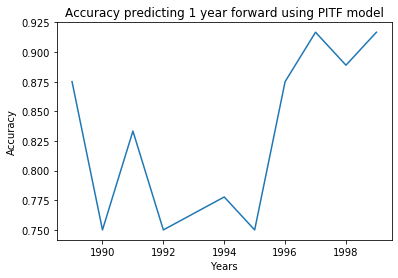

In [47]:
plt.plot(years_list, accuracy_list)
plt.xlabel('Years')
plt.ylabel('Accuracy')
plt.title('Accuracy predicting 1 year forward using PITF model')

Text(0.5, 1.0, 'Recall scores for predicting 1 year forward using PITF model')

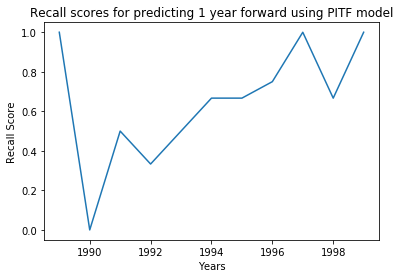

In [59]:
plt.plot(years_list, recall_list)
plt.xlabel('Years')
plt.ylabel('Recall Score')
plt.title('Recall scores for predicting 1 year forward using PITF model')

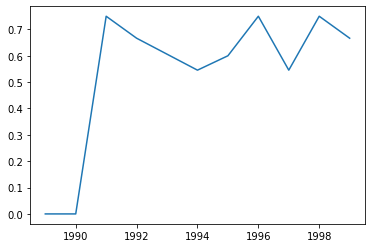

In [25]:
plt.plot(years_list, precision_list)

## Predict 3 years forward

In [26]:

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

accuracy_list = []
recall_list = []
precision_list = []
f1_list = []
years_list = [1992, 1995, 1998]

for yr in years_list:
    pitf_matched_dr_post = pitf_matched[(pitf_matched['year'] >= 1990) & (pitf_matched['year'] <= yr)]\
                            .drop(columns=['match_id', 'group', 'sample', 'sftgcode', 'year'])
    pitf_matched_dm_post = pd.get_dummies(pitf_matched_dr_post, drop_first=True)
    
    x_test = pitf_matched_dm_post.drop(columns=['sftpcons_1'])
    Y_test = pitf_matched_dm_post['sftpcons_1']
    
    # get metrics of prediction for current year
    prediction = lr.predict(x_test)
    accuracy_list.append(accuracy_score(Y_test, prediction))
    recall_list.append(recall_score(Y_test, prediction))
    precision_list.append(precision_score(Y_test, prediction))
    f1_list.append(f1_score(Y_test, prediction))
    
    x_train = pd.concat([x_train, x_test], axis=0)
    Y_train = pd.concat([Y_train, Y_test], axis=0)
    
    # fitting model again with 1 more year of data
    lr = LogisticRegression(solver='lbfgs')
    fit = lr.fit(x_train, Y_train)

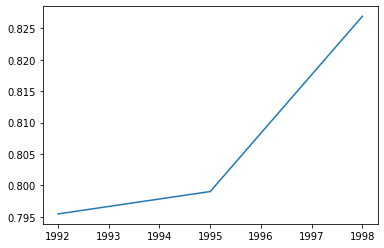

In [27]:
plt.plot(years_list, accuracy_list)

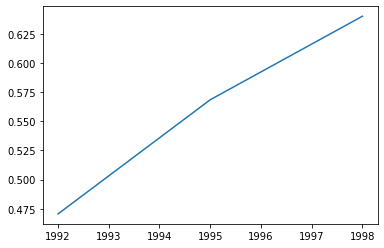

In [28]:
plt.plot(years_list, f1_list)

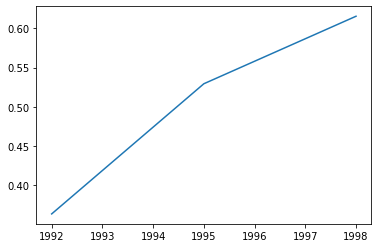

In [29]:
plt.plot(years_list, recall_list)

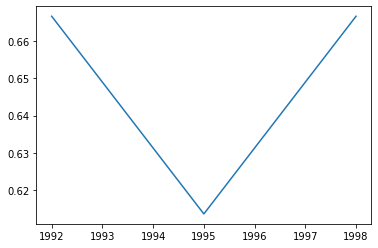

In [30]:
plt.plot(years_list, precision_list)

## predicting 5 years forwards

In [60]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

accuracy_list = []
recall_list = []
precision_list = []
f1_list = []
years_list = [1994, 1999]

for yr in years_list:
    pitf_matched_dr_post = pitf_matched[(pitf_matched['year'] >= yr-5) & (pitf_matched['year'] <= yr)]\
                            .drop(columns=['match_id', 'group', 'sample', 'sftgcode', 'year'])
    pitf_matched_dm_post = pd.get_dummies(pitf_matched_dr_post, drop_first=True)
    
    x_test = pitf_matched_dm_post.drop(columns=['sftpcons_1'])
    Y_test = pitf_matched_dm_post['sftpcons_1']
    
    # get metrics of prediction for current year range
    prediction = lr.predict(x_test)
    accuracy_list.append(accuracy_score(Y_test, prediction))
    recall_list.append(recall_score(Y_test, prediction))
    precision_list.append(precision_score(Y_test, prediction))
    f1_list.append(f1_score(Y_test, prediction))
    
    x_train = pd.concat([x_train, x_test], axis=0)
    Y_train = pd.concat([Y_train, Y_test], axis=0)
    
    # fitting model again with 5 more years of data
    lr = LogisticRegression(solver='lbfgs')
    fit = lr.fit(x_train, Y_train)

Text(0.5, 1.0, 'Accuracy predicting 5 years forward using PITF model')

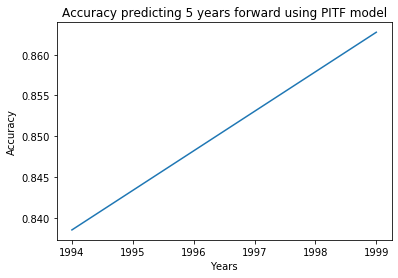

In [51]:
plt.plot(years_list, accuracy_list)
plt.xlabel('Years')
plt.ylabel('Accuracy')
plt.title('Accuracy predicting 5 years forward using PITF model')

Text(0.5, 1.0, 'F1-scores predicting 5 years forward using PITF model')

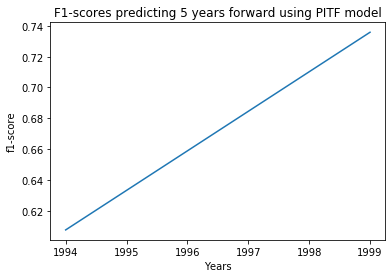

In [56]:
plt.plot(years_list, f1_list)
plt.xlabel('Years')
plt.ylabel('f1-score')
plt.title('F1-scores predicting 5 years forward using PITF model')

Text(0.5, 1.0, 'Precision predicting 5 years forward using PITF model')

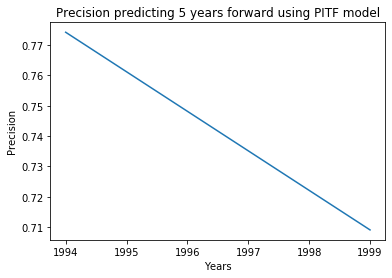

In [55]:
plt.plot(years_list, precision_list)
plt.xlabel('Years')
plt.ylabel('Precision')
plt.title('Precision predicting 5 years forward using PITF model')

Text(0.5, 1.0, 'Recall scores for predicting 5 years forward using PITF model')

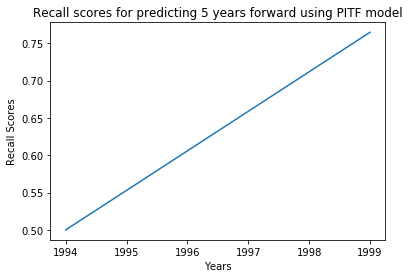

In [61]:
plt.plot(years_list, recall_list)
plt.xlabel('Years')
plt.ylabel('Recall Scores')
plt.title('Recall scores for predicting 5 years forward using PITF model')

## exploring some of the results

In [36]:
pitf_matched[pitf_matched.iloc[:, 0].index==526]

,sftgcode,year,byregn2,sftptv2a,group,sftpcons,disp4cat,maccat,logim,sample,match_id
526,BUL,1995,3,Partial democracy with factionalism,1,0,0,0,-0.681946,2.0,218


In [37]:
x_test[80:90]

,logim,byregn2_2,byregn2_3,byregn2_4,byregn2_5,sftptv2a_Full democracy,sftptv2a_Partial autocracy,sftptv2a_Partial democracy with factionalism,sftptv2a_Partial democracy without factionalism,sftptv2a_Transition,disp4cat_1,maccat_1
562,0.931444,0,0,0,0,0,0,1,0,0,0,0
614,0.500510,0,0,0,0,0,0,0,0,0,0,0
724,0.892224,0,0,0,0,0,0,0,1,0,0,0
888,0.699385,0,0,0,0,0,1,0,0,0,0,0
479,-0.299854,0,1,0,0,0,0,0,1,0,0,1
488,-1.815827,0,1,0,0,1,0,0,0,0,0,0
526,-0.681946,0,1,0,0,0,0,1,0,0,0,0
608,-1.847079,0,1,0,0,1,0,0,0,0,1,0
509,-1.077559,0,1,0,0,0,0,1,0,0,0,0
657,-1.879340,0,1,0,0,1,0,0,0,0,0,0


In [38]:
lr.predict_proba(x_test)[80:90]

array([[0.28885325, 0.71114675],
       [0.92048765, 0.07951235],
       [0.77310996, 0.22689004],
       [0.69290937, 0.30709063],
       [0.15665733, 0.84334267],
       [0.94961987, 0.05038013],
       [0.34745788, 0.65254212],
       [0.89567191, 0.10432809],
       [0.50692655, 0.49307345],
       [0.95443995, 0.04556005]])

In [39]:
Y_test[80:90]

562    1
614    0
724    0
888    0
479    1
488    0
526    0
608    0
509    1
657    0
Name: sftpcons_1, dtype: uint8

In [40]:
prediction[80:90]

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0], dtype=uint8)

In [41]:
pitf_matched = pitf_matched.reset_index(drop=True)

In [42]:
from choicemodels import MultinomialLogit, MultinomialLogitResults
# pitf_matched.set_index('match_id', inplace=True)
results = MultinomialLogit(pitf_matched.loc[:, ['disp4cat', 'maccat', 'logim', 'sftptv2a']],\
                        observation_id_col='match_id',\
                        model_expression='disp4cat +  maccat + logim + sftptv2a',\
                        choice_col='sftpcons')

ModuleNotFoundError: No module named 'choicemodels'

In [ ]:
X = pitf_matched.loc[:, ['disp4cat', 'maccat', 'logim', 'sftptv2a']]

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit()

## Creating our own case-match data (not needed as PITF supplied data comes cleaned and matched)

In [ ]:
#. creating test and control classes
test = pitf_data[pitf_data['sftpcons']==1]
control = pitf_data[pitf_data['sftpcons']==0]

In [ ]:
1053/351

In [ ]:
np.array(test.columns)

In [ ]:
test.head(3)

In [ ]:
#. calculating propensity scores
m = Matcher(test, control, 
            exclude=['sample', 'logim', 'maccat', 'sftptv2a', 'sftgcode', 'disp4cat'], 
            yvar='sftpcons')

In [ ]:
m.fit_scores(balance=True, nmodels=100)

In [ ]:
m.predict_scores()

In [ ]:
m.plot_scores()

In [ ]:
m.tune_threshold(method='min')

In [ ]:
m.match(threshold=0.0001, nmatches=3, method='min')

In [ ]:
m.record_frequency()

In [ ]:
m.assign_weight_vector()


In [ ]:
m.matched_data.sort_values("match_id")